In [48]:
!pip install kaggle

In [49]:
# Configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

### Importing Face Mask Dataset

In [50]:
# API to fetch the dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [51]:
# Extracting the dataset
from zipfile import ZipFile
dataset = "/content/face-mask-dataset.zip"

with ZipFile(dataset,'r') as z:
  z.extractall()
  print("Data is extracted")

Data is extracted


In [52]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


### Importing the dependencies

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow # as the imshow CV2 is not allowed in collab
from PIL import Image
from sklearn.model_selection import train_test_split


### Analysing the folders

In [54]:
# Setting up dataset paths
with_mask = "/content/data/with_mask/"
without_mask = "/content/data/without_mask/"

In [55]:
with_mask_files = os.listdir(with_mask)
without_mask_files = os.listdir(without_mask)

In [56]:
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1582.jpg', 'with_mask_2476.jpg', 'with_mask_2703.jpg', 'with_mask_543.jpg', 'with_mask_1639.jpg']
['with_mask_2617.jpg', 'with_mask_1021.jpg', 'with_mask_1729.jpg', 'with_mask_82.jpg', 'with_mask_2874.jpg']


In [57]:
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2229.jpg', 'without_mask_933.jpg', 'without_mask_1098.jpg', 'without_mask_1863.jpg', 'without_mask_3505.jpg']
['without_mask_2895.jpg', 'without_mask_1588.jpg', 'without_mask_3351.jpg', 'without_mask_35.jpg', 'without_mask_2122.jpg']


In [58]:
# Checking the total number of images
print("No of mask images",len(with_mask_files))
print("No of without mask images",len(without_mask_files))

No of mask images 3725
No of without mask images 3828


**Creating Labels for the two class of images**

- With mask = 1
- Wihout mask = 0

In [59]:
# Creating labels for the set of images
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [60]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [61]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [62]:
# Combining these two sets
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the image

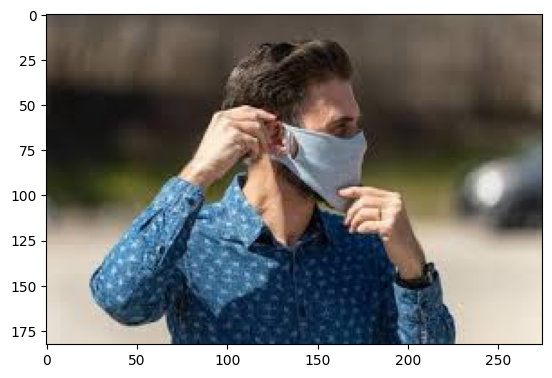

In [63]:
# Displaying with mask image
img = mpimg.imread(with_mask+'with_mask_2590.jpg')
imgplot = plt.imshow(img)
plt.show()

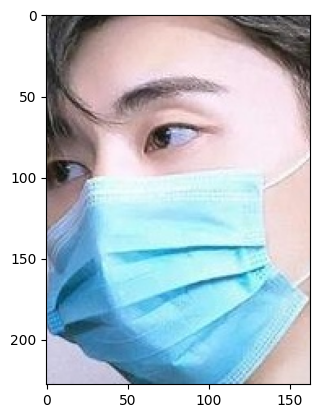

In [64]:
# Displaying with mask image
img = mpimg.imread(with_mask+'with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

From the above we can conclude that the image dimensions are not uniform throughout the data

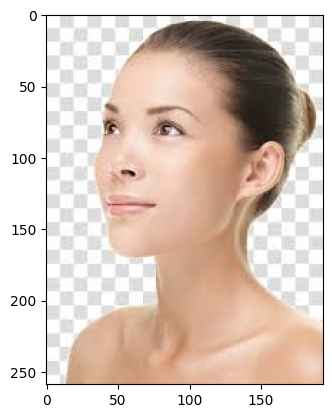

In [65]:
# Displaying without mask image
img = mpimg.imread(without_mask+'without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

### Image Processing

1. Resize the Images
2. Convert the Images to numpy arrays

In [66]:
# Convert images to numpy arrays
with_mask_path = with_mask
without_mask_path = without_mask

data = []

for img_file in os.listdir(with_mask_path):
  file_path = os.path.join(with_mask_path + img_file)
  image = Image.open(file_path)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


for img_file in os.listdir(without_mask_path):
  file_path = os.path.join(without_mask_path + img_file)
  image = Image.open(file_path)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [67]:
type(data)

list

In [68]:
len(data)

7553

array([[[ 99,  65,  19],
        [100,  66,  20],
        [101,  67,  21],
        ...,
        [166, 209, 244],
        [184, 217, 240],
        [229, 248, 253]],

       [[ 98,  64,  18],
        [ 99,  65,  19],
        [100,  66,  20],
        ...,
        [166, 210, 245],
        [185, 217, 241],
        [230, 248, 253]],

       [[ 98,  64,  18],
        [ 98,  64,  18],
        [ 99,  65,  19],
        ...,
        [166, 210, 245],
        [185, 218, 241],
        [230, 248, 253]],

       ...,

       [[ 42,  35,  25],
        [ 46,  36,  23],
        [ 53,  39,  21],
        ...,
        [ 19,  39,  78],
        [ 24,  46,  85],
        [ 27,  50,  89]],

       [[ 42,  35,  25],
        [ 46,  36,  23],
        [ 53,  39,  21],
        ...,
        [ 15,  35,  74],
        [ 17,  39,  79],
        [ 20,  44,  82]],

       [[ 42,  35,  25],
        [ 46,  36,  23],
        [ 53,  39,  21],
        ...,
        [ 13,  33,  72],
        [ 13,  35,  75],
        [ 16,  40,  78]]], dtype=uint8)
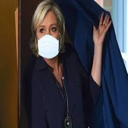

In [69]:
data[0]

In [70]:
type(data[0])

numpy.ndarray

In [71]:
data[0].shape

(128, 128, 3)

In [72]:
# Converting Image list and label list to numpy arrays
X = np.array(data)
y = np.array(labels)

In [73]:
type(X)

numpy.ndarray

In [74]:
type(y)

numpy.ndarray

In [76]:
print("Shape of X :",X.shape)
print("Shape of y :",y.shape)

Shape of X : (7553, 128, 128, 3)
Shape of y : (7553,)


**Train Test Split**

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [78]:
print(X.shape,X_train.shape,X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [79]:
# Scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

array([[[217, 221, 222],
        [218, 222, 223],
        [219, 223, 224],
        ...,
        [254, 255, 255],
        [254, 255, 253],
        [255, 255, 251]],

       [[218, 222, 223],
        [219, 223, 224],
        [219, 223, 224],
        ...,
        [254, 255, 255],
        [254, 255, 254],
        [255, 255, 252]],

       [[218, 222, 223],
        [219, 223, 224],
        [220, 224, 225],
        ...,
        [254, 255, 255],
        [254, 255, 254],
        [255, 255, 253]],

       ...,

       [[113,  99,  87],
        [120, 104,  91],
        [127, 110,  97],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[109,  95,  83],
        [116, 100,  87],
        [123, 106,  93],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[105,  91,  81],
        [112,  96,  83],
        [119, 102,  89],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
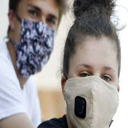

In [80]:
X_train[0]

In [81]:
X_train_scaled[0]

array([[[0.85098039, 0.86666667, 0.87058824],
        [0.85490196, 0.87058824, 0.8745098 ],
        [0.85882353, 0.8745098 , 0.87843137],
        ...,
        [0.99607843, 1.        , 1.        ],
        [0.99607843, 1.        , 0.99215686],
        [1.        , 1.        , 0.98431373]],

       [[0.85490196, 0.87058824, 0.8745098 ],
        [0.85882353, 0.8745098 , 0.87843137],
        [0.85882353, 0.8745098 , 0.87843137],
        ...,
        [0.99607843, 1.        , 1.        ],
        [0.99607843, 1.        , 0.99607843],
        [1.        , 1.        , 0.98823529]],

       [[0.85490196, 0.87058824, 0.8745098 ],
        [0.85882353, 0.8745098 , 0.87843137],
        [0.8627451 , 0.87843137, 0.88235294],
        ...,
        [0.99607843, 1.        , 1.        ],
        [0.99607843, 1.        , 0.99607843],
        [1.        , 1.        , 0.99215686]],

       ...,

       [[0.44313725, 0.38823529, 0.34117647],
        [0.47058824, 0.40784314, 0.35686275],
        [0.49803922, 0

### **Building Convolutional Neural Network**

In [82]:
import tensorflow as tf
from tensorflow import keras

In [83]:
num_of_classes = 2

model = keras.Sequential([])

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [85]:
# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [86]:
# Training the model
history = model.fit(X_train_scaled,y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - acc: 0.7104 - loss: 0.6010 - val_acc: 0.8810 - val_loss: 0.2619
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.8932 - loss: 0.2696 - val_acc: 0.9140 - val_loss: 0.2261
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9117 - loss: 0.2294 - val_acc: 0.9256 - val_loss: 0.1993
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9245 - loss: 0.1953 - val_acc: 0.9107 - val_loss: 0.2203
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.9283 - loss: 0.1719 - val_acc: 0.9207 - val_loss: 0.2077


**Model Evaluation**

In [87]:
loss , accuracy = model.evaluate(X_test_scaled,y_test)
print("Loss :",loss)
print("Accuracy :",accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.9260 - loss: 0.2327
Loss : 0.2399834841489792
Accuracy : 0.9199205636978149


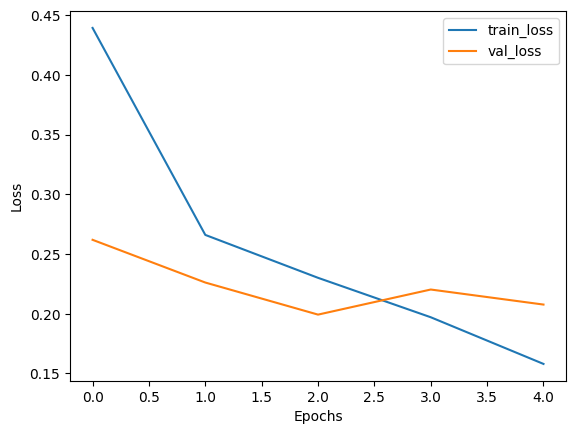

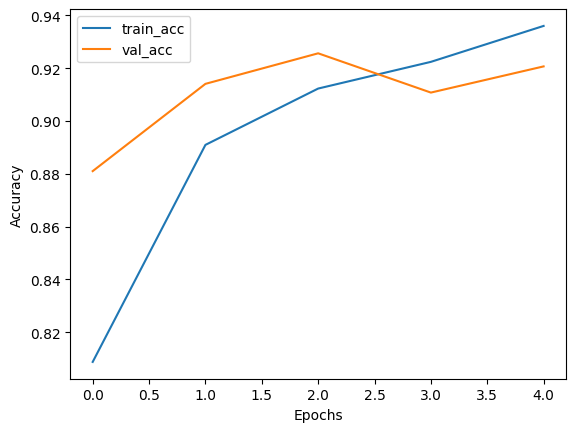

In [89]:
# Plotting the graphs
h = history
# Plotting the loss value
plt.plot(h.history['loss'],label='train_loss')
plt.plot(h.history['val_loss'],label='val_loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Plotting the accuracy value
plt.plot(h.history['acc'],label='train_acc')
plt.plot(h.history['val_acc'],label='val_acc')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

**Predictive System**

Path of the image to be predicted/content/sample.jpg


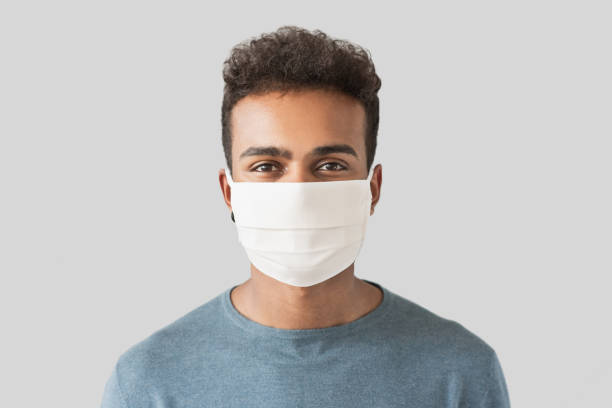

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[0.25941095 0.6958442 ]]
1
The person is wearing the mask


In [91]:
# Making a predictive system
input_image_path =input('Path of the image to be predicted')

# Reading the image
input_image = cv2.imread(input_image_path)

# Showing the image
cv2_imshow(input_image)

# Resizing the image
input_image_resized = cv2.resize(input_image,(128,128))

# Scaling the image
input_image_scaled = input_image_resized/255

# Reshaping the image
input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])

# Prediction
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)

# Lableing the image
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

# Giving the output
if input_pred_label==1:
  print("The person is wearing the mask")
else:
  print("The person is not wearing the mask")